In [1]:
import numpy as np
from keras.src.models import Sequential
from keras.src.layers import LSTM, Input, Dropout
from keras.src.layers import RepeatVector
from keras.src.layers import Dense
from keras.src.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.src.models import Model
import seaborn as sns

In [2]:
healthy_training_files = [
    'o1-76-si.csv',
    'o2-74-si.csv',
    'o3-75-si.csv',
    'o4-77-si.csv',
    'y2-29-si.csv',
    'y3-23-si.csv',
    'y4-21-si.csv',
    'y5-26-si.csv'
]
healthy_testing_files = [
    'o5-71-si.csv',
    'y1-23-si.csv',
]
unhealthy_testing_files = [
    'pd1-si.csv',
    'pd2-si.csv',
    'pd3-si.csv',
    'pd4-si.csv',
    'pd5-si.csv', ]

dataframes = [pd.read_csv(f'gait-data-csv/{file}') for file in healthy_training_files]
training_df = pd.concat(dataframes, ignore_index=True)

In [3]:
scaler = StandardScaler()
scaler = scaler.fit(training_df[['stride interval (seconds)']])

healthy_test_df = pd.concat([pd.read_csv(f'gait-data-csv/{file}') for file in healthy_testing_files])

training_df['stride interval (seconds)'] = scaler.transform(training_df[['stride interval (seconds)']])
healthy_test_df['stride interval (seconds)'] = scaler.transform(healthy_test_df[['stride interval (seconds)']])

seq_size = 30

def to_sequences(x, y, seq_size = 1):
    x_values = []
    y_values = []
    
    for i in range(len(x) - seq_size):
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i:(i+seq_size)].values)
    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequences(training_df[['stride interval (seconds)']], training_df['time (seconds)'], seq_size)
testX, testY = to_sequences(healthy_test_df[['stride interval (seconds)']], healthy_test_df['time (seconds)'], seq_size)

C:\Users\junxi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,937 (968.50 KB)

 Trainable params: 247,937 (968.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 277307.8438 - val_loss: 287417.4062
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 258867.6406 - val_loss: 285487.0938
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 252980.8750 - val_loss: 234042.6875
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 190728.0625 - val_loss: 172340.0469
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 138302.6250 - val_loss: 128903.1328
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 106436.7891 - val_loss: 105895.6484
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 88430.6406 - val_loss: 78951.0469
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 123070.8672 - val_loss: 100337.3672
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 84640.5156 - val_loss: 85052.5312
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 82344.2422 - val_loss: 90243.3516
Epoch 11/50
159/159 ━━━━━━━━━━━━

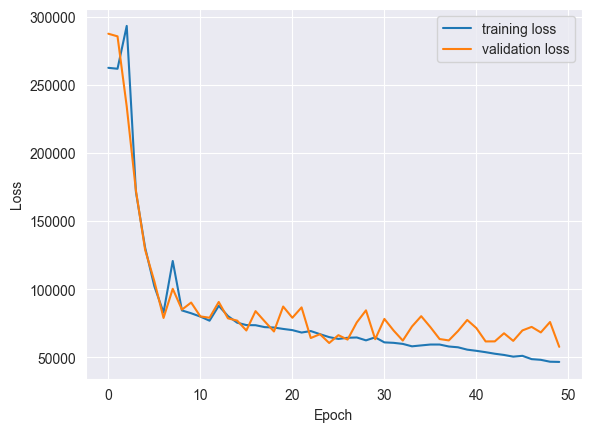

In [5]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(rate = 0.2))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


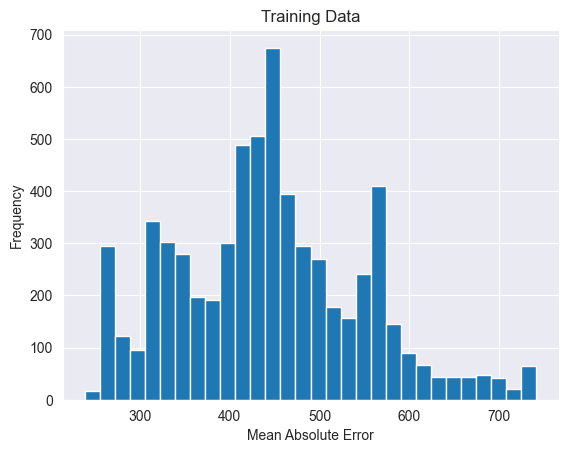

In [6]:
trainPredict = model.predict(trainX)
trainPredict = np.nan_to_num(trainPredict)
trainX = np.nan_to_num(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis = 1)
plt.title('Training Data')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Frequency')
plt.hist(trainMAE, bins=30)
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


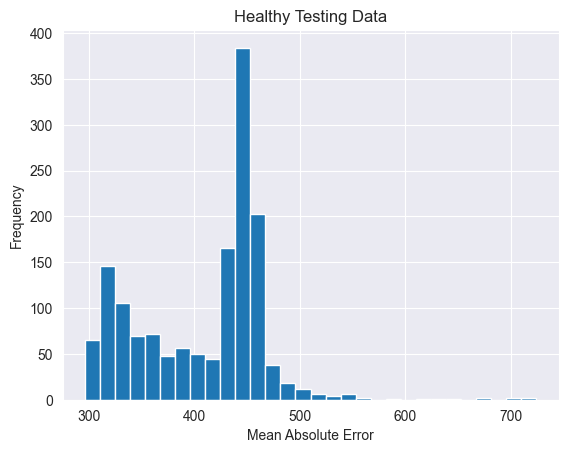

In [32]:
trainPredict = model.predict(testX)
trainPredict = np.nan_to_num(trainPredict)
testX = np.nan_to_num(testX)
healthyMAE = np.mean(np.abs(trainPredict - testX), axis = 1)
plt.title('Healthy Testing Data')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Frequency')
plt.hist(healthyMAE, bins=30)
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


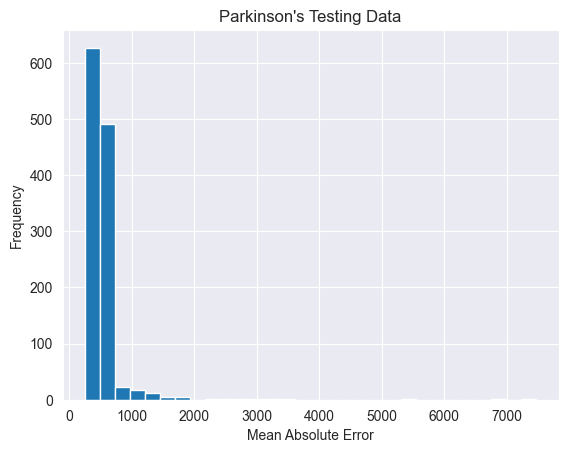

In [13]:
unhealthy_test_df = pd.concat([pd.read_csv(f'gait-data-csv/{file}') for file in unhealthy_testing_files])
unhealthy_test_df['stride interval (seconds)'] = scaler.transform(unhealthy_test_df[['stride interval (seconds)']])

unhealthyX, unhealthyY = to_sequences(unhealthy_test_df[['stride interval (seconds)']], unhealthy_test_df['time (seconds)'], seq_size)

trainPredict = model.predict(unhealthyX)
trainPredict = np.nan_to_num(trainPredict)
testX = np.nan_to_num(testX)
unhealthyMAE = np.mean(np.abs(trainPredict - unhealthyX), axis = 1)
plt.title("Parkinson's Testing Data")
plt.xlabel('Mean Absolute Error')
plt.ylabel('Frequency')
plt.hist(unhealthyMAE, bins=30)
plt.show()

In [29]:
max_MAE = 600

In [35]:
anomaly_df = 0
anomaly_df

0

In [50]:
anomaly_df = pd.DataFrame(healthy_test_df[seq_size:])
anomaly_df['healthyMAE'] = healthyMAE
anomaly_df['maxMAE'] = max_MAE
anomaly_df['anomaly'] = anomaly_df['healthyMAE'] > anomaly_df['maxMAE']
anomaly_df['stride interval (seconds)'] = healthy_test_df[seq_size:]['stride interval (seconds)']

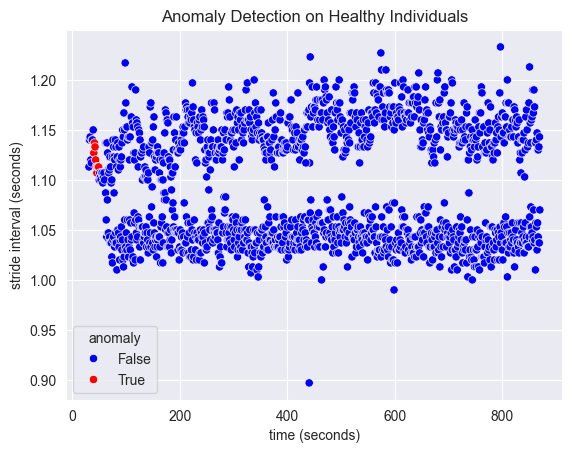

In [53]:
stride_intervals = anomaly_df['stride interval (seconds)'].values.reshape(-1, 1)
stride_intervals_inverse = scaler.inverse_transform(stride_intervals)

plt.title("Anomaly Detection on Healthy Individuals")
plt.ylabel("stride interval (seconds)")
sns.scatterplot(x=anomaly_df['time (seconds)'], y=stride_intervals_inverse.flatten(), hue=anomaly_df['anomaly'], palette=['blue', 'red'])
plt.show()

In [55]:
anomaly_df = pd.DataFrame(unhealthy_test_df[seq_size:])
anomaly_df['unhealthyMAE'] = unhealthyMAE
anomaly_df['maxMAE'] = max_MAE
anomaly_df['anomaly'] = anomaly_df['unhealthyMAE'] > anomaly_df['maxMAE']
anomaly_df['stride interval (seconds)'] = unhealthy_test_df[seq_size:]['stride interval (seconds)']

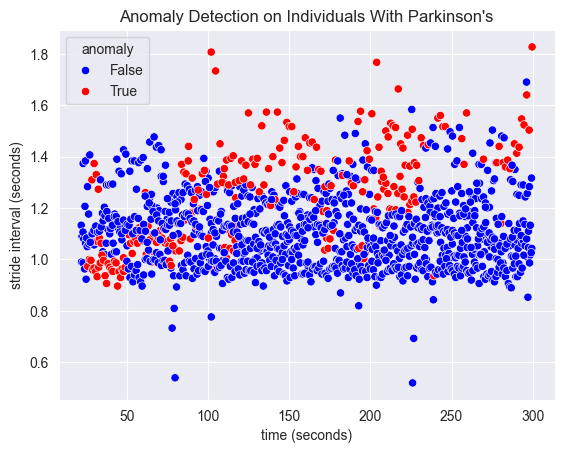

In [56]:
stride_intervals = anomaly_df['stride interval (seconds)'].values.reshape(-1, 1)
stride_intervals_inverse = scaler.inverse_transform(stride_intervals)

plt.title("Anomaly Detection on Individuals With Parkinson's")
plt.ylabel("stride interval (seconds)")
sns.scatterplot(x=anomaly_df['time (seconds)'], y=stride_intervals_inverse.flatten(), hue=anomaly_df['anomaly'], palette=['blue', 'red'])
plt.show()